Task 1: To understand the business problem that we are trying to solve and load the required libraries and the dataset
into the jupyter notebook session.

In [14]:
# standard libraries
from pathlib import Path
from itertools import combinations_with_replacement

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# import data
data_path = Path('creditcard.csv')
data = pd.read_csv(data_path)

Task 2: To perform exploratory data analysis on the dataset to observe the patterns in the data, how they are related
to each other and to visualize the data

In [16]:
# shape of dataset
data.shape

(284807, 31)

In [17]:
# head of data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
# check target class distribution
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

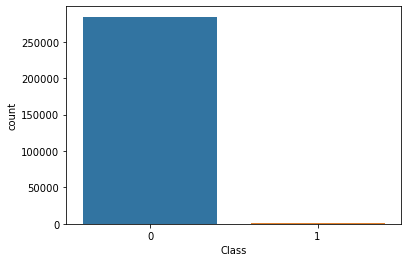

In [20]:
# visual plot of target distribution
sns.countplot(x='Class', data=data)

C:\Users\bacur\anaconda3\envs\creditcard\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


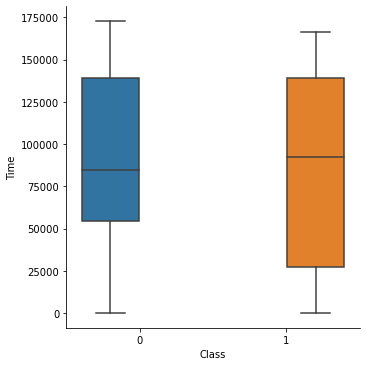

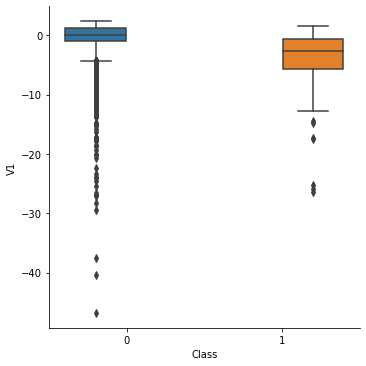

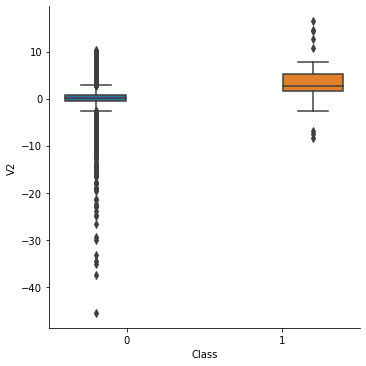

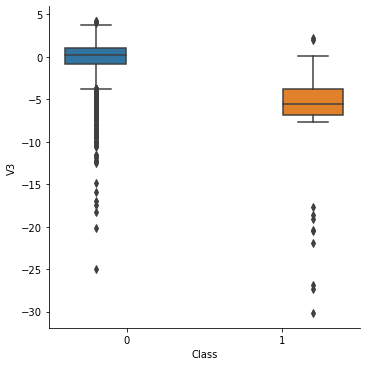

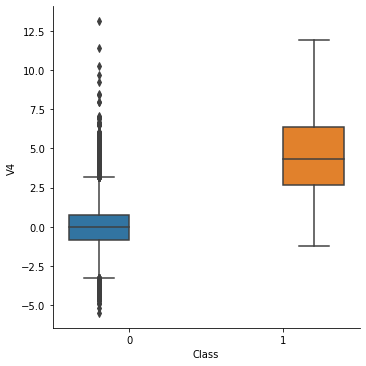

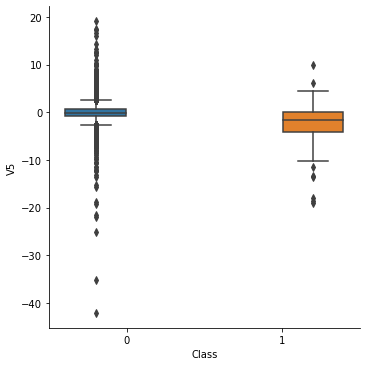

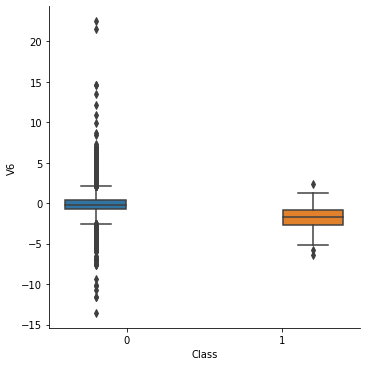

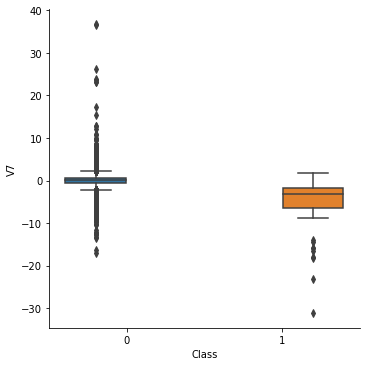

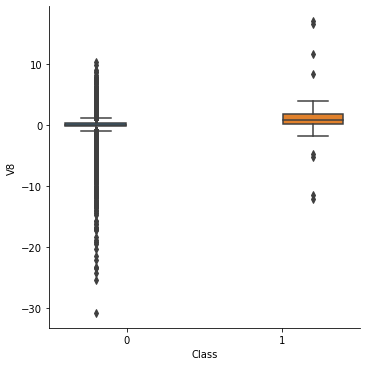

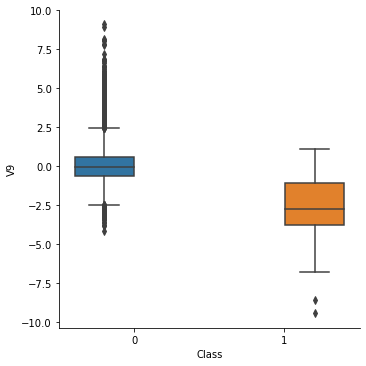

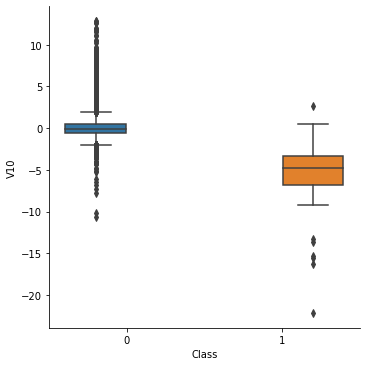

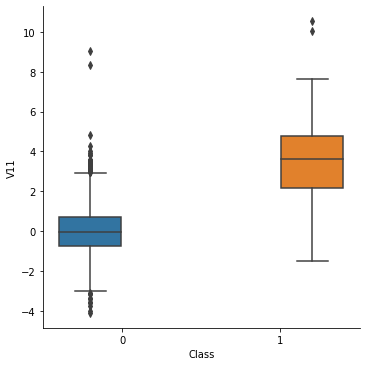

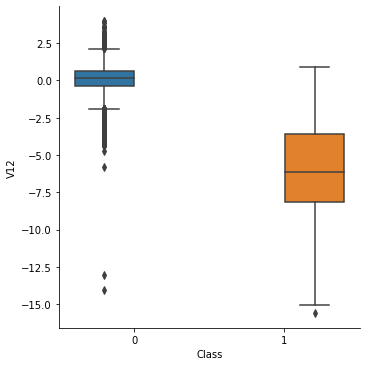

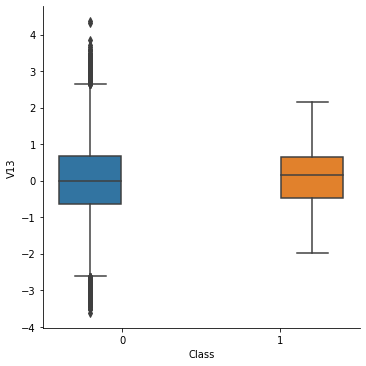

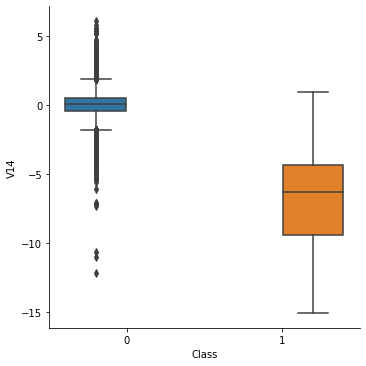

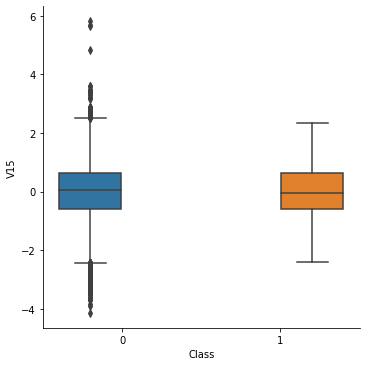

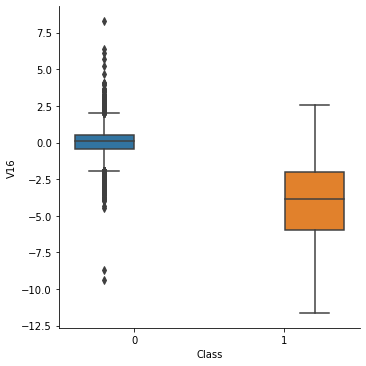

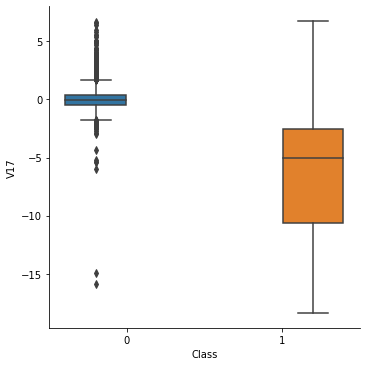

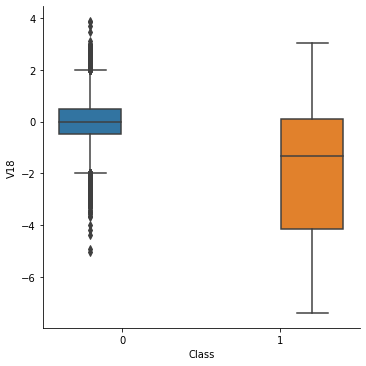

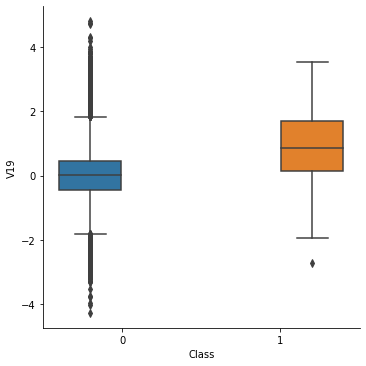

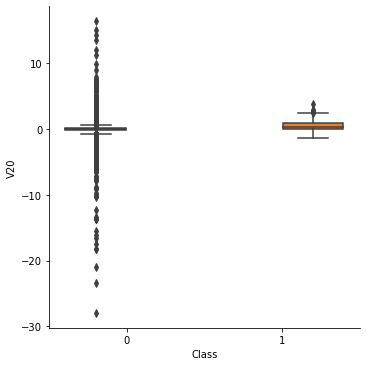

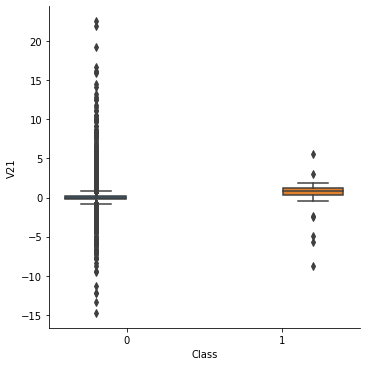

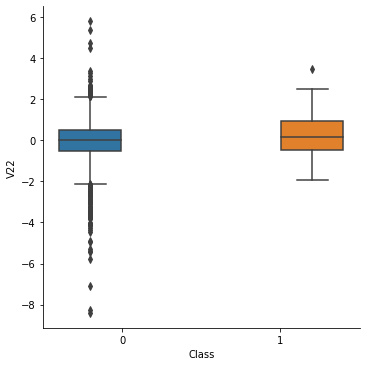

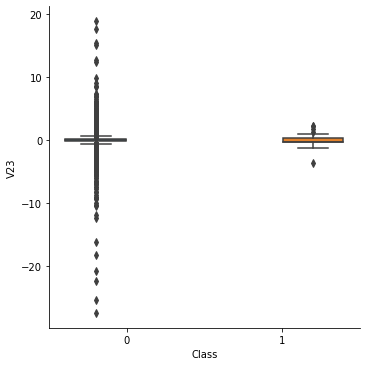

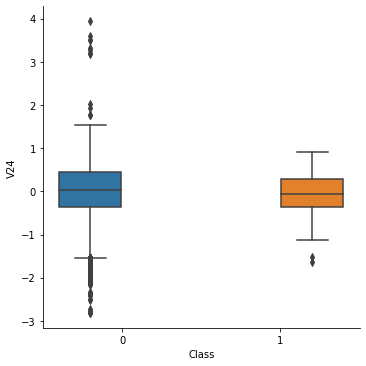

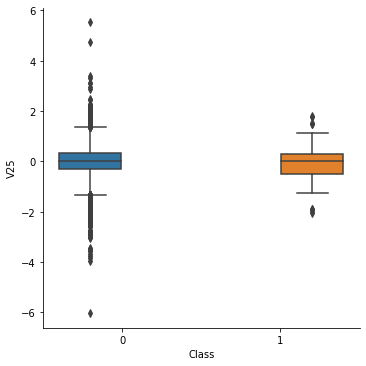

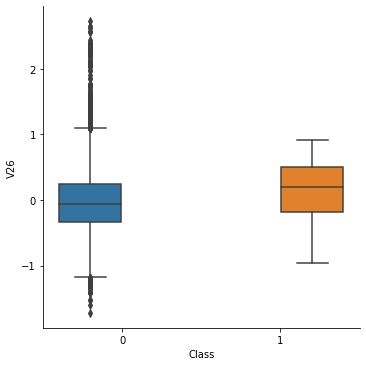

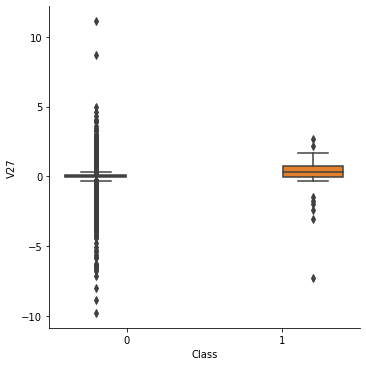

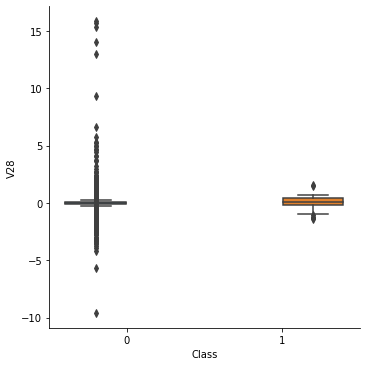

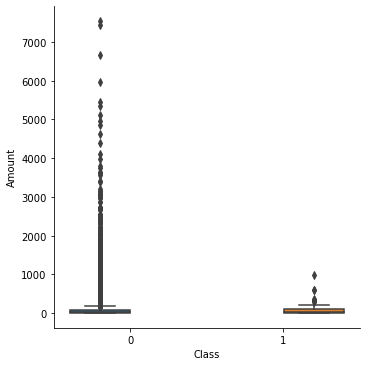

In [21]:
# scatter plots based on features
sampled_data = data.groupby('Class').apply(lambda x: x.sample(frac=.1))
for col in data.drop(columns=['Class']).columns:
    sns.catplot(x='Class', y=col, data=sampled_data, hue='Class', kind='box')

Task 3: To understand how to choose best evaluation metric for this business problem

In [22]:
round(data['Class'].value_counts(normalize=True) * 100, 2)

0    99.83
1     0.17
Name: Class, dtype: float64

A model that features a high recall score would be more suitable for a fraud case.

Task 4: To create a baseline model and where we will not handle the imbalanced property of the data and which we will
use to compare with other advanced models that we will build in upcoming tasks

In [23]:
# extract features and target
X = data.drop(columns='Class')
y = data['Class']

In [24]:
# split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=7)

In [25]:
# create random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=7)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

In [26]:
# create prediction
y_hat = rf.predict(X_test)

<AxesSubplot:>

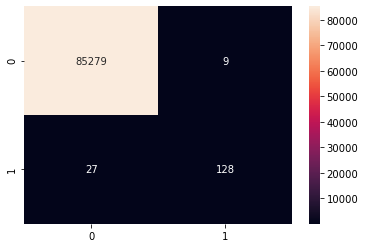

In [27]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='0.0f')

In [28]:
# print classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85288
           1       0.93      0.83      0.88       155

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



Task 5: To create a classification model and where we will handle the imbalanced property of the data by using SMOTE
data sampling technique

In [29]:
# resample original data using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=7)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [30]:
# train a random forest on SMOTE data

rf_smote = RandomForestClassifier(random_state=7)
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier(random_state=7)

<AxesSubplot:>

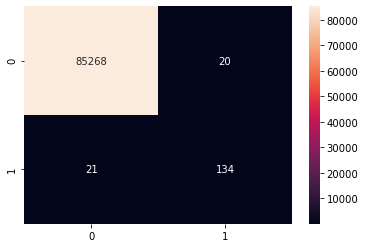

In [31]:
# prediction the classes on test data using model built on SMOTE and plot confusion matrix
y_hat_smote = rf_smote.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_hat_smote), annot=True, fmt='0.0f')

In [32]:
# print classification report
print(classification_report(y_test, y_hat_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85288
           1       0.87      0.86      0.87       155

    accuracy                           1.00     85443
   macro avg       0.93      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



Task 6: To learn and implement how to ROC AUC curve and its interpretation

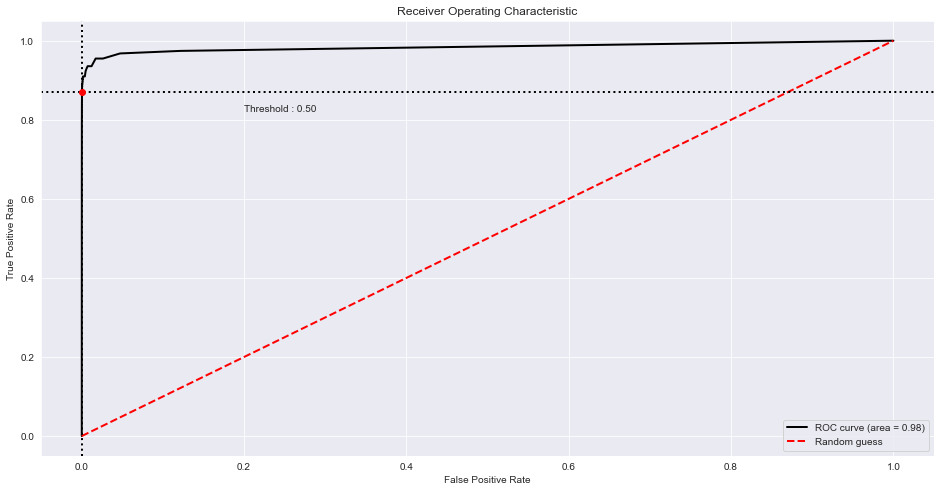

In [33]:
# compute AUC on smote model
from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test, rf_smote.predict_proba(X_test)[:, 1], labels=[0, 1])
plt.figure(figsize=(16,8))
bc.plot_roc_curve()
plt.show()

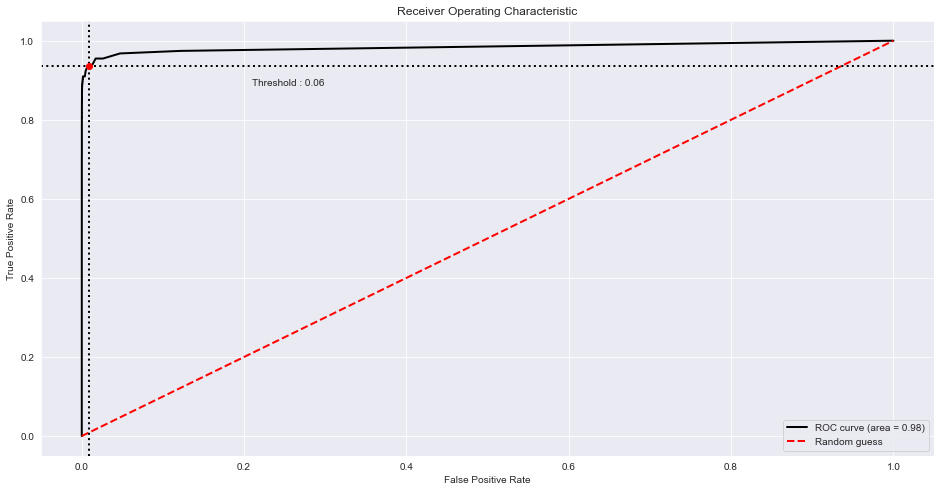

In [34]:
# use another probability threshold so that we can get to the elbow position
bc = BinaryClassification(y_test, rf_smote.predict_proba(X_test)[:, 1], labels=[0, 1], threshold=.06)
plt.figure(figsize=(16,8))
bc.plot_roc_curve()
plt.show()

Task 7:  To learn and implement how to adjust probability threshold to increase recall of a model

In [ ]:
# compute the probabilities of test observations using rf_smote model
y_hat_prob = rf_smote.predict_proba(X_test)[:, 1]

In [ ]:
# compare these probabilities against new threshold
y_pred_labels = (y_hat_prob >= .6)